In [1]:
import QUANTAXIS as QA 


In [2]:
import quant.weekTrend as wt


/root/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [4]:
wt.weekDFANA('000810')

call here


2020-5-17
                    open   high    low  close    volume      amount    EMA12  \
date       code                                                                
2019-01-02 000810   5.57   5.65   5.56   5.59   20952.0  1.1715e+07      NaN   
2019-01-03 000810   5.60   5.66   5.54   5.58   25670.0  1.4360e+07      NaN   
2019-01-04 000810   5.50   5.72   5.43   5.70   39420.0  2.2244e+07      NaN   
2019-01-07 000810   5.75   5.97   5.75   5.95   62721.0  3.6724e+07      NaN   
2019-01-08 000810   5.90   6.29   5.85   6.00   85670.0  5.2034e+07      NaN   
2019-01-09 000810   6.06   6.17   5.95   6.03   85917.0  5.2327e+07      NaN   
2019-01-10 000810   6.05   6.09   5.93   5.95   59819.0  3.5764e+07      NaN   
2019-01-11 000810   5.97   6.02   5.89   5.99   45693.0  2.7189e+07      NaN   
2019-01-14 000810   5.99   6.02   5.87   5.93   29197.0  1.7323e+07      NaN   
2019-01-15 000810   5.93   6.04   5.85   6.03   49522.0  2.9655e+07      NaN   
...                  ...    ..

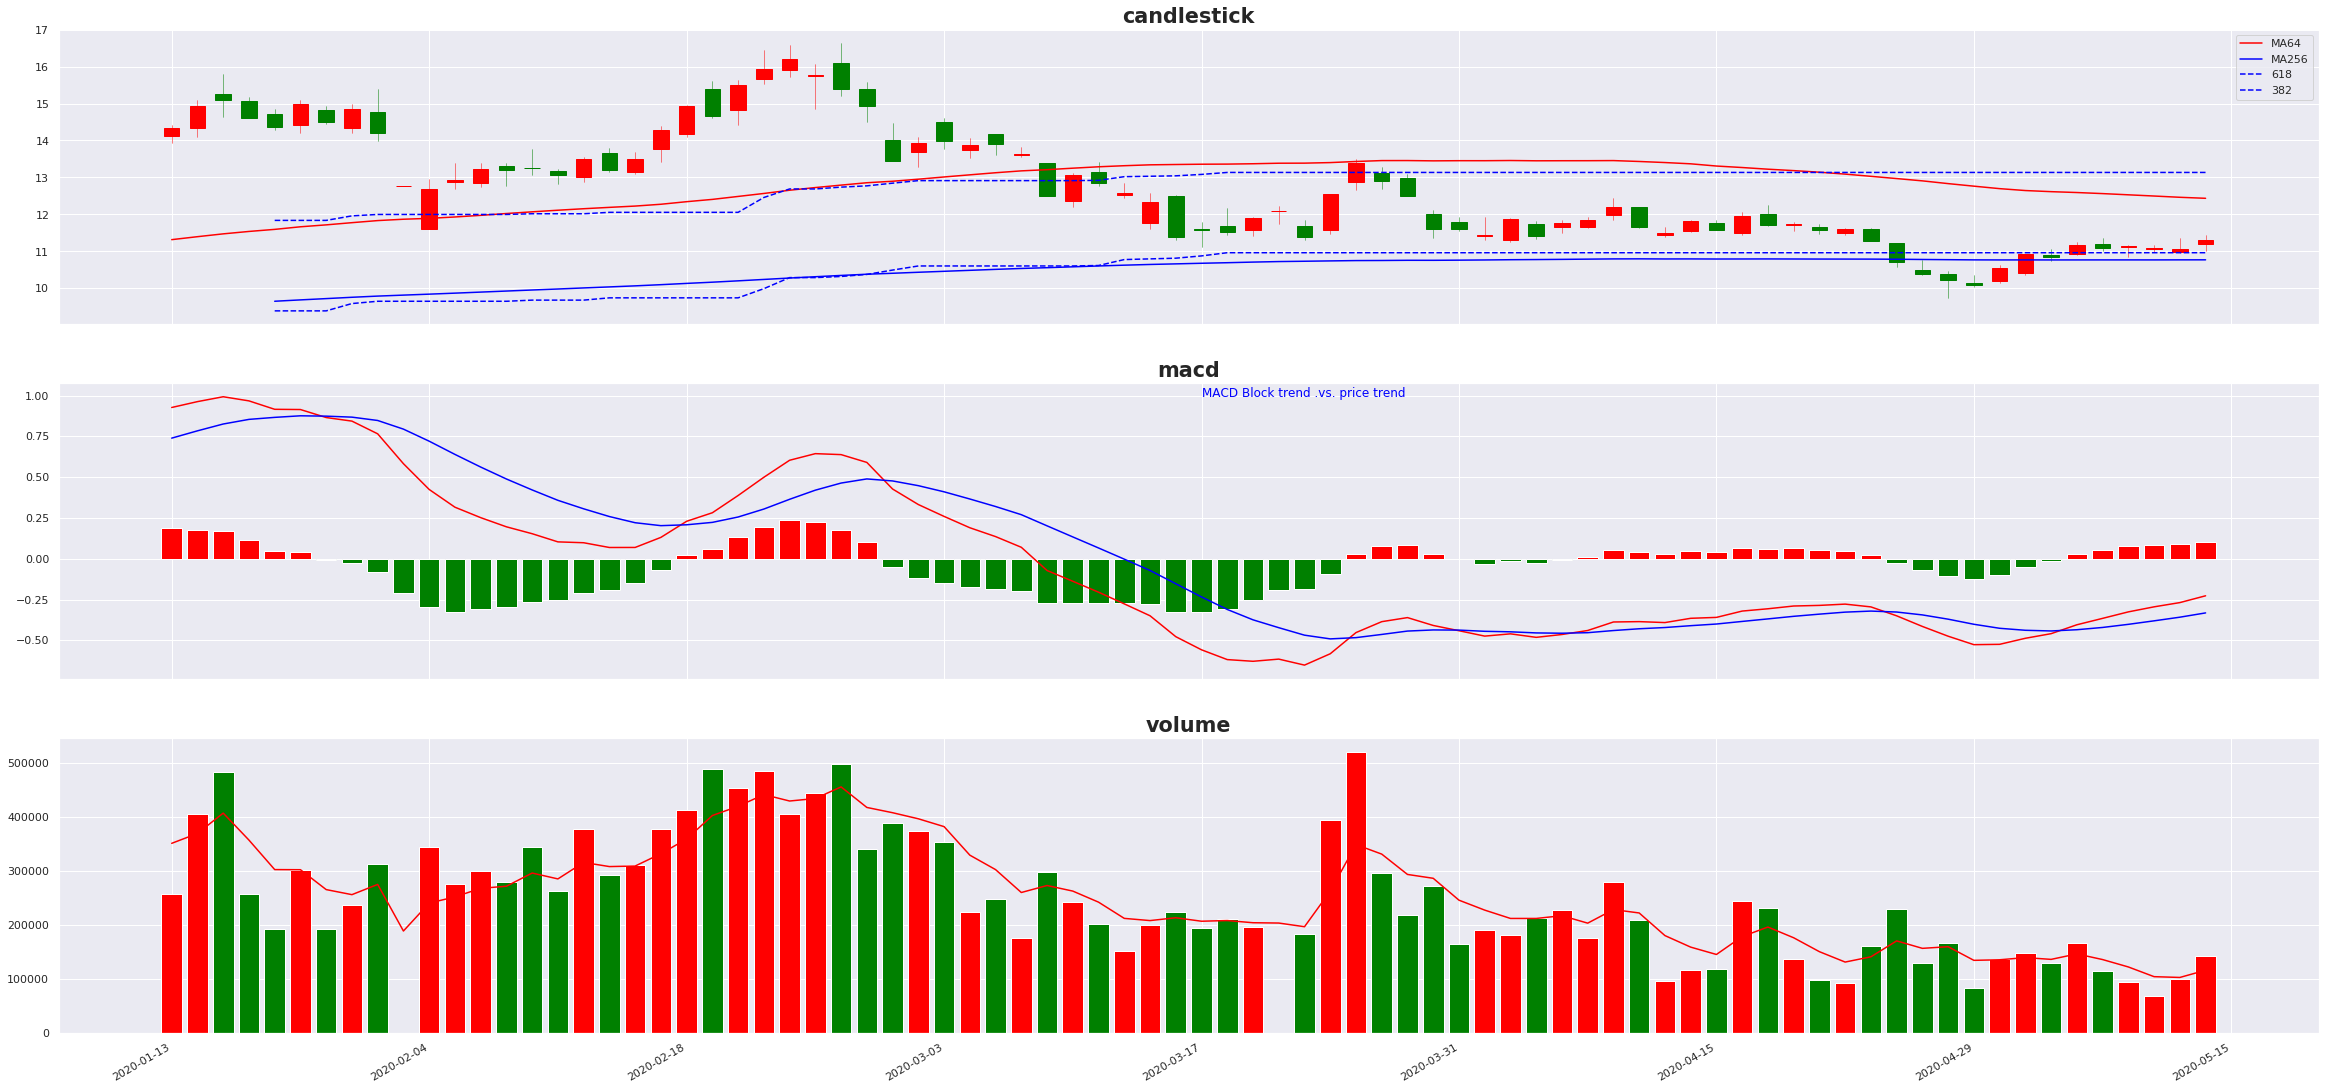

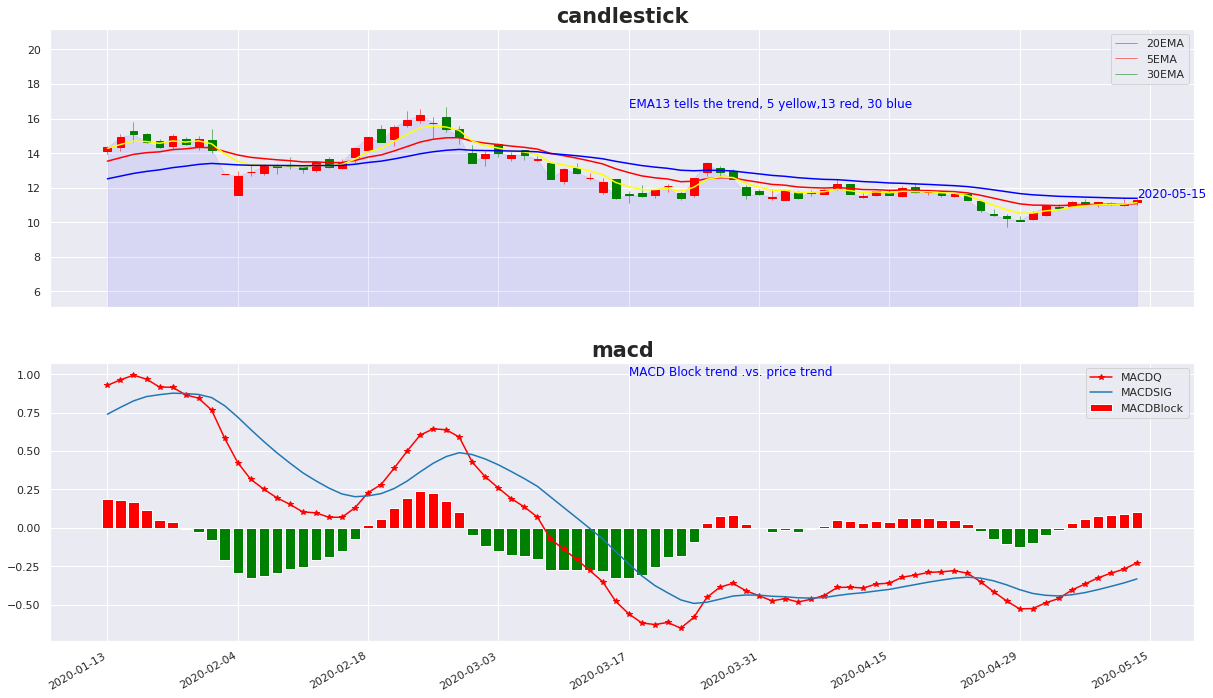

In [5]:
import quant.MACD as ma
ma.macdANA('000810')

call here


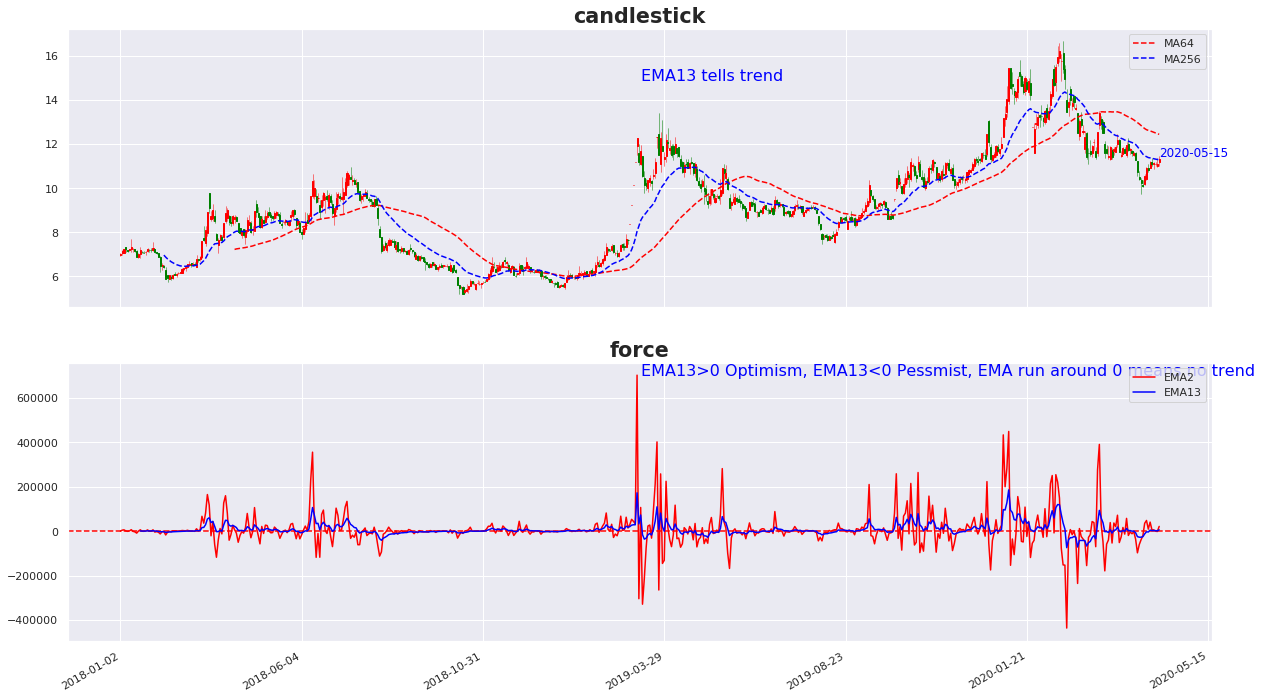

ValueError: time data '2020-5-17' does not match format '%Y-%m-%d %H:%M:%S'

In [6]:
import quant.force as force
force.forceANA('000810')

2020-05-08
                             open   high    low  close     volume      amount  \
datetime            code                                                        
2019-12-02 10:00:00 000810  10.49  10.53  10.35  10.50  2237600.0  2.3359e+07   
2019-12-02 10:30:00 000810  10.49  10.53  10.46  10.49  1045200.0  1.0968e+07   
2019-12-02 11:00:00 000810  10.49  10.59  10.48  10.49  1682000.0  1.7702e+07   
2019-12-02 11:30:00 000810  10.49  10.50  10.44  10.50   742600.0  7.7761e+06   
2019-12-02 13:30:00 000810  10.52  10.53  10.41  10.42  1107600.0  1.1595e+07   
2019-12-02 14:00:00 000810  10.42  10.48  10.41  10.46   584600.0  6.1045e+06   
2019-12-02 14:30:00 000810  10.45  10.46  10.39  10.43   869800.0  9.0700e+06   
2019-12-02 15:00:00 000810  10.43  10.50  10.43  10.50  1292600.0  1.3542e+07   
2019-12-03 10:00:00 000810  10.36  10.38  10.24  10.31  2847500.0  2.9353e+07   
2019-12-03 10:30:00 000810  10.33  10.43  10.25  10.37  1179800.0  1.2187e+07   
...              

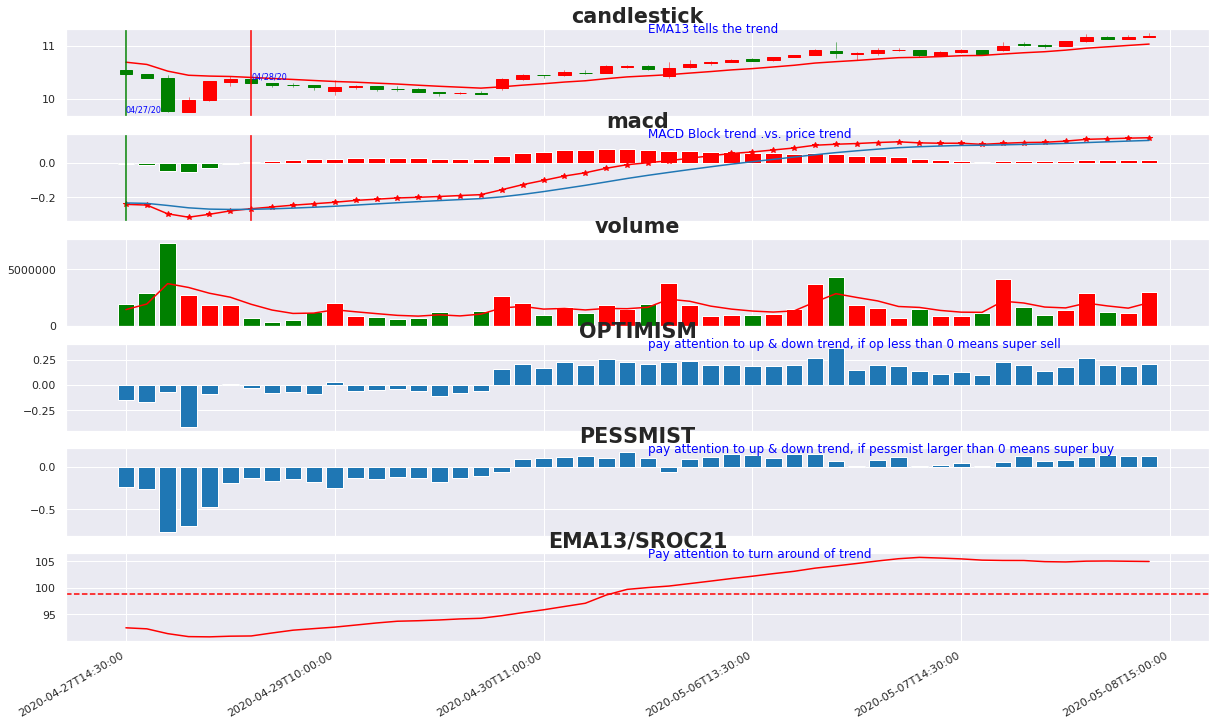

In [12]:
min30 = ma.minMACDANA('000810')

In [45]:
dd = QA.QA_fetch_stock_day_adv('600745','2019-01-01','2020-05-11')

In [46]:
sample=dd.data

In [47]:
def doubleAvgmin(dd, short=5, long=15):
    """
    1.DIF向上突破DEA，买入信号参考。
    2.DIF向下跌破DEA，卖出信号参考。
    """
    start = dd.index.get_level_values('date')[0].strftime('%Y-%m-%d')
    end = dd.index.get_level_values('date')[-1].strftime('%Y-%m-%d')
    mindata = QA.QA_fetch_stock_min_adv(dd.index.get_level_values('code')[0],start,end, frequence='60min')
    sample =mindata.data
    sample['short']=QA.EMA(sample.close,short)
    sample['long']=QA.EMA(sample.close,long)
    CROSS_5 = QA.CROSS(sample.short, sample.long)
    CROSS_15 = QA.CROSS(sample.long, sample.short)

    C15 = np.where(CROSS_15 == 1, 3, 0)
    m = np.where(CROSS_5 == 1, 1, C15)
    #single = m[:-1].tolist()
    #single.insert(0, 0)
    #sample['single'] = single
    sig = []
    for i in range(0, len(m), 4):
        if (i + 3 < len(m)):
            temp = m[i] + m[i + 1] + m[i + 2] + m[i + 3]
            sig.append(temp)
        else:
            sig.append(0)
    print('{} vs {} for {}'.format(dd.shape[0],len(sig),dd.index.get_level_values('code')[0]))
    try:
        dd['single'] = sig
    except:
        print('error with {}'.format(sample.index.get_level_values('code')[0]))
        dd['single']=0

    return dd

In [48]:
import numpy as np
doubleAvgmin(sample)
import quant.MACD as macd 
import quant.Util as uti
sample = macd.MINMACACalculate(sample)
quotes = macd.MINcandlestruct(sample,uti.dayindex,uti.dayformate)

316 vs 316 for 600745


In [49]:
sample[10:30]

,,open,high,low,close,volume,amount,single,EMA12,EMA5,MA64,...,up,down,EMA26,MACDQ,MACDSIG,MACDBlock,VolumeEMA,nhigh,nlow,SROC
date,code,,,,,,,,,,,,,,,,,,,,,
2019-01-16,600745,19.86,20.05,19.39,19.81,52983.0,1.0475e+08,0,20.2359,20.0454,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,45412.4254,21.20,19.21,100.0
2019-01-17,600745,19.81,19.83,19.23,19.28,35302.0,6.8911e+07,0,20.0659,19.7883,NaN,...,20.3842,19.7817,NaN,NaN,NaN,NaN,42016.1070,21.20,19.21,100.0
2019-01-18,600745,19.44,19.76,19.22,19.30,44530.0,8.6645e+07,0,19.9329,19.6247,NaN,...,20.2529,19.6543,NaN,NaN,NaN,NaN,42858.3992,21.20,19.21,100.0
2019-01-21,600745,19.16,20.16,19.16,19.79,58085.0,1.1530e+08,1,19.9086,19.6800,NaN,...,20.2261,19.6283,NaN,NaN,NaN,NaN,47951.3788,21.20,19.21,100.0
2019-01-22,600745,20.08,20.08,18.98,19.16,49296.0,9.5764e+07,3,19.7832,19.5063,NaN,...,20.1026,19.5085,NaN,NaN,NaN,NaN,48400.6117,22.04,18.98,100.0
2019-01-23,600745,19.15,19.15,17.71,18.43,80409.0,1.4751e+08,0,19.5596,19.1470,NaN,...,19.8847,19.2970,NaN,NaN,NaN,NaN,59086.3429,22.04,17.71,100.0
2019-01-24,600745,18.58,20.27,17.93,20.27,125592.0,2.4572e+08,1,19.6757,19.5217,NaN,...,19.9909,19.4000,NaN,NaN,NaN,NaN,81277.4183,22.04,17.71,100.0
2019-01-25,600745,20.39,22.22,20.38,20.64,147198.0,3.1353e+08,0,19.8317,19.8947,NaN,...,20.1370,19.5418,NaN,NaN,NaN,NaN,103265.8237,22.22,17.71,100.0
2019-01-28,600745,20.43,22.18,20.43,21.50,99510.0,2.1397e+08,0,20.0996,20.4300,NaN,...,20.3914,19.7887,NaN,NaN,NaN,NaN,102013.3175,22.22,17.71,100.0


In [40]:
import datetime
import smtplib
from email.mime.text import MIMEText
import QUANTAXIS as QA
try:
    assert QA.__version__>='1.1.0'
except AssertionError:
    print('pip install QUANTAXIS >= 1.1.0 请升级QUANTAXIS后再运行此示例')
    import QUANTAXIS as QA
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import abupy
from abupy import ABuRegUtil
from concurrent.futures import ThreadPoolExecutor
from functools import reduce
import warnings
read_dictionary = np.load('/media/sf_GIT/vest/liutong.npy',allow_pickle=True).item()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtk
import mpl_finance as mpf
import matplotlib.dates as mpd
import quant.Util as uti
import datetime

QUANTAXIS>> No handles with labels found to put in legend.
No handles with labels found to put in legend.
QUANTAXIS>> No handles with labels found to put in legend.
No handles with labels found to put in legend.


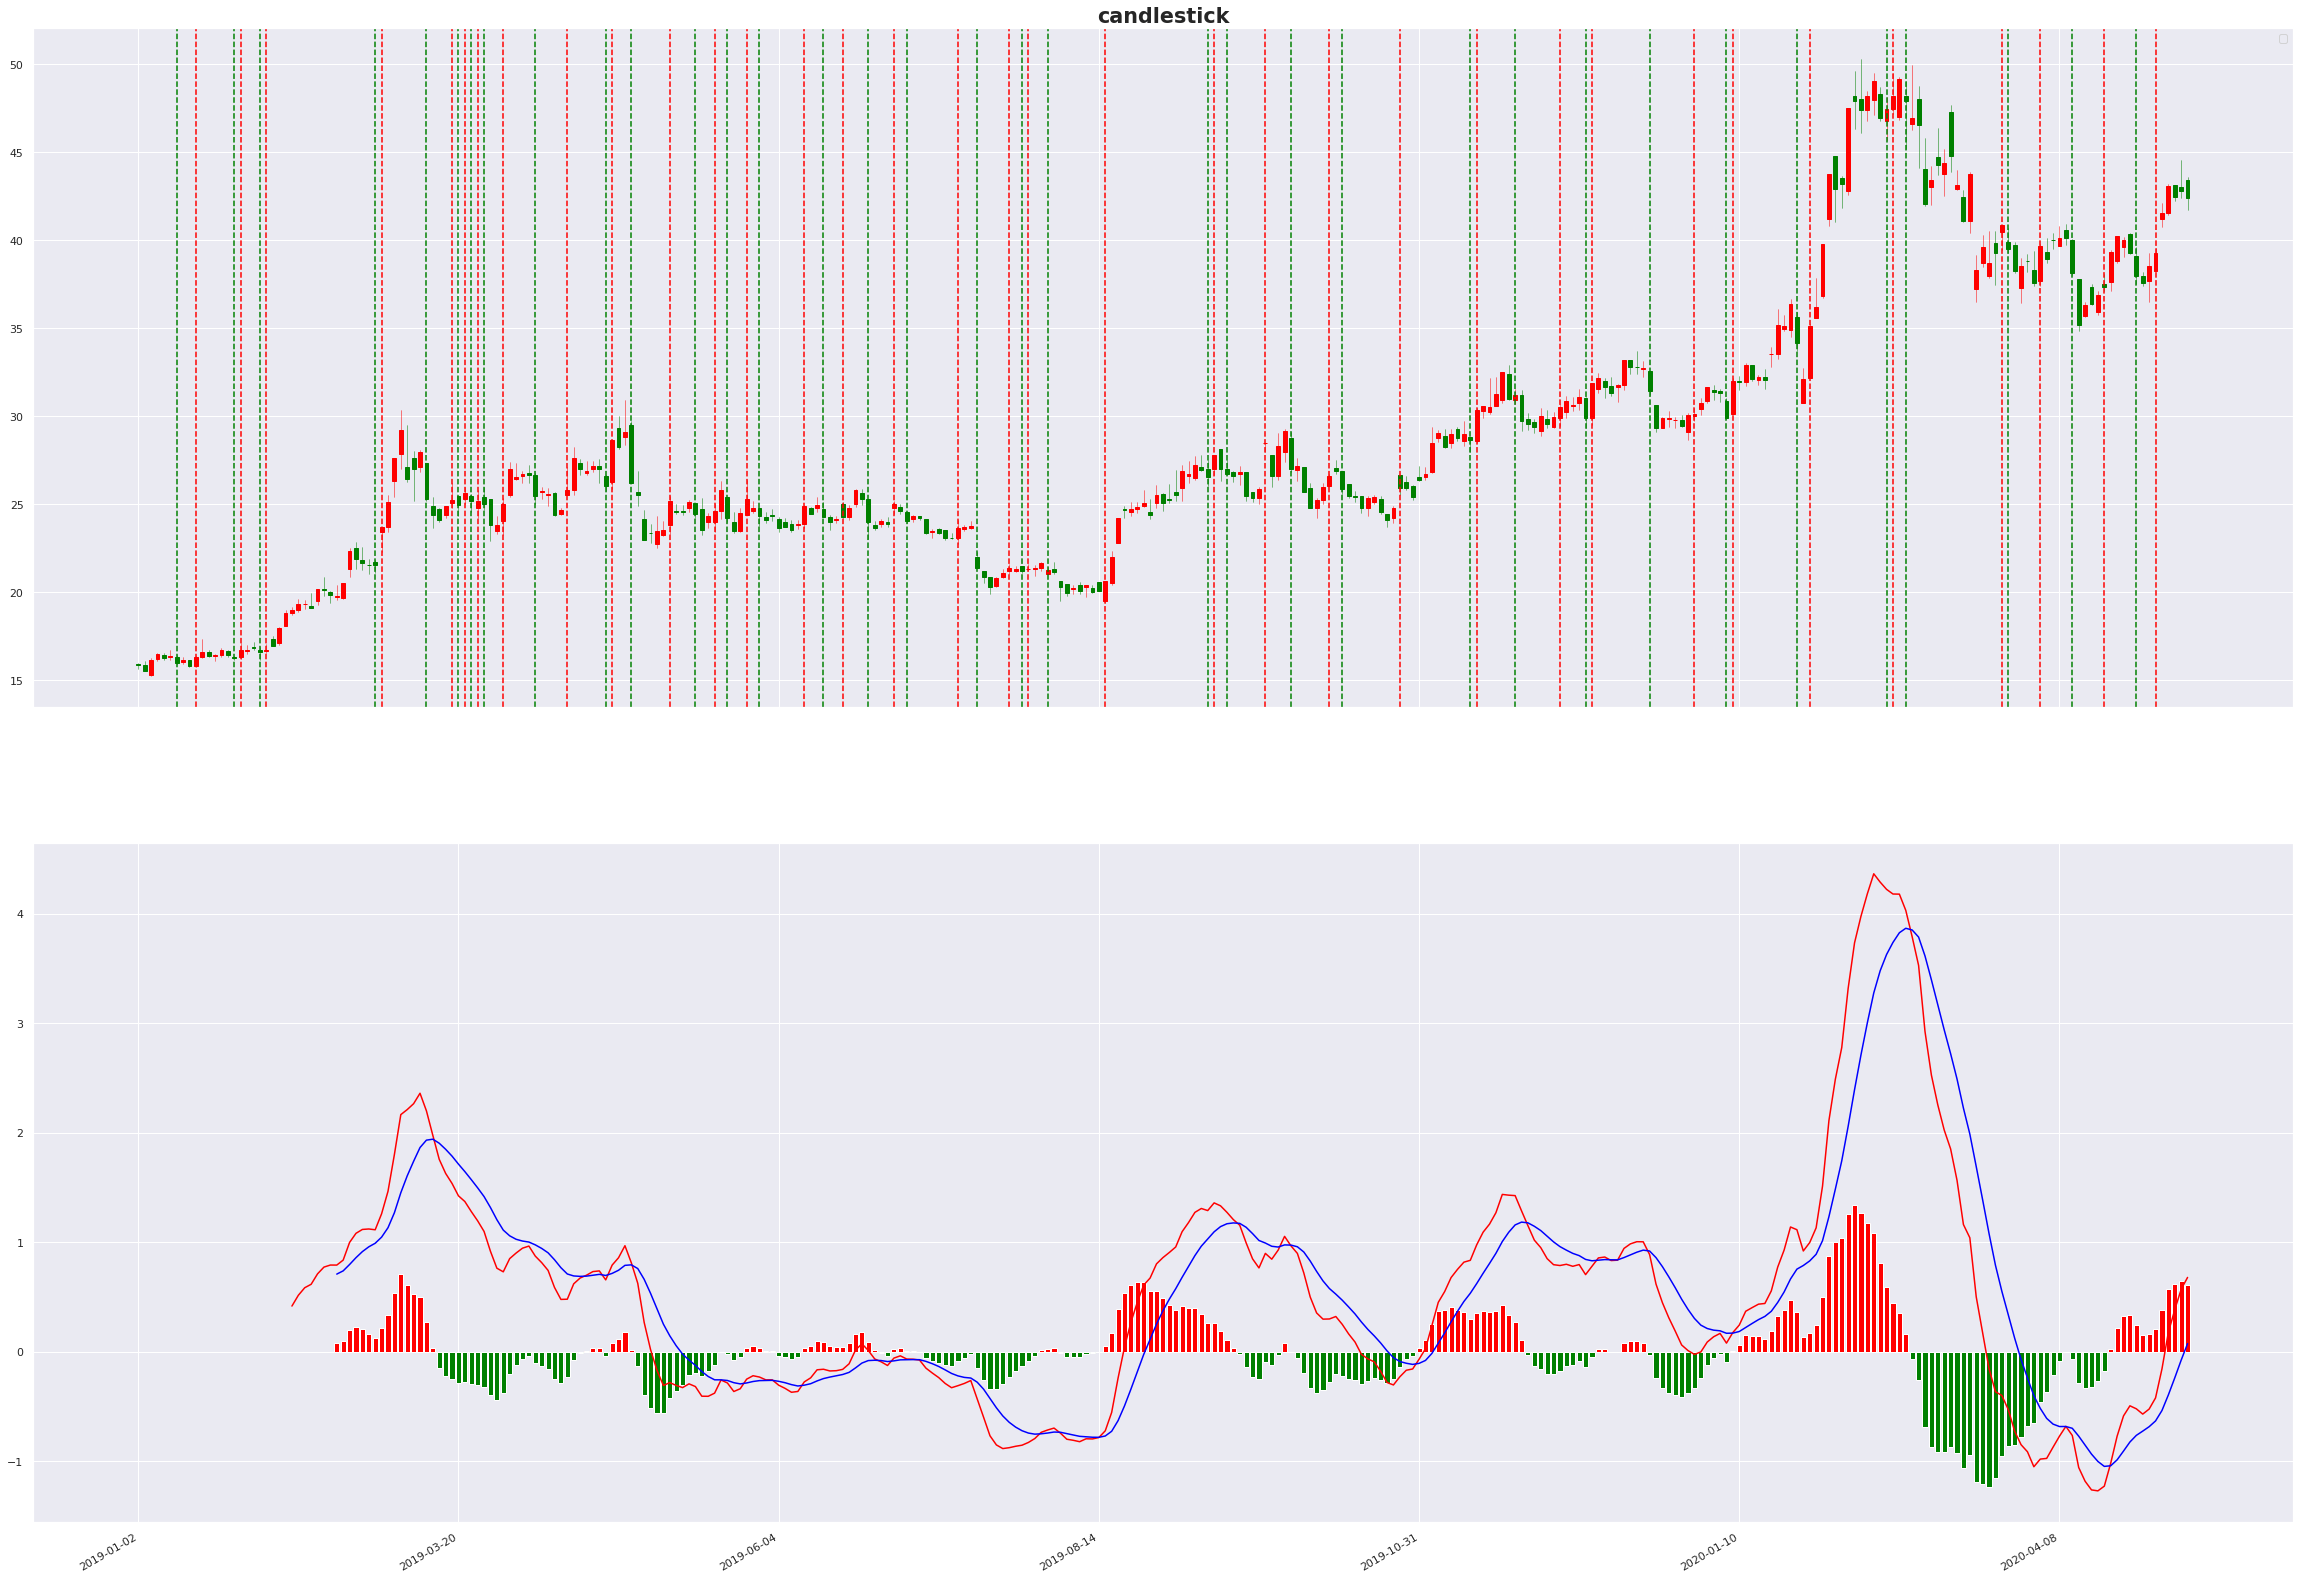

In [41]:
    N = sample.shape[0]
    ind = np.arange(N)

    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return sample.index.get_level_values(uti.dayindex)[thisind].strftime(uti.dayformate)

    fig = plt.figure()
    fig.set_size_inches(40.5, 30.5)
    # plt.xlabel('Trading Day')
    # plt.ylabel('MACD EMA')
    #ax2 = fig.add_subplot(6, 1, 1)
    ax2 = fig.add_subplot(2,1,1)
    ax2.set_title("candlestick", fontsize='xx-large', fontweight='bold')

    # fig,ax=plt.subplots()
    # mpf.candlestick_ochl(ax2,quotes,width=0.2,colorup='r',colordown='g',alpha=1.0)
    # ax2.xaxis_date()
    # plt.setp(plt.gca().get_xticklabels(),rotation=30)
    # ax2.plot(ind,sample.close,'b-',marker='*')
    mpf.candlestick_ochl(ax2, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)
   
    for i in range(len(sample.single)):
        if(sample.single[i]==1):
            ax2.axvline(x=i,ls='--',color='red')
        if(sample.single[i]==3):
            ax2.axvline(x=i,ls='--',color='green')
    #ax2.plot(ind,sample.EMA5,'yellow')
    #ax2.plot(ind,sample.EMA20,'green')
    #ax2.plot(ind,sample.EMA30,'purple')
    #ax2.plot(ind,sample.nhigh)
    #ax2.plot(ind,sample.nlow)
   # ax2.fill_between(ind,sample.EMA13,color='blue',alpha=0.08)

    #ax2.text(N / 2, pd.DataFrame.max(sample.high), "EMA13 tells the trend",
    #         fontdict={'size': '12', 'color': 'b'})
    ax2.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax2.grid(True)
    ax2.legend(loc='best')
    fig.autofmt_xdate()
    
    
    ax1 = fig.add_subplot(2,1,2,sharex=ax2)
    
    ax1.plot(ind, sample.MACDQ, 'r-',label='quick')
    ax1.plot(ind, sample.MACDSIG,'blue',label='sig')
    m_red = np.where(sample.MACDBlock>=0,sample.MACDBlock,0)
    m_green = np.where(sample.MACDBlock<0,sample.MACDBlock,0)
    ax1.bar(ind, m_red,color='red')
    ax1.bar(ind,m_green,color='green')

    ax1.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
    ax2.legend(loc='best')
    fig.autofmt_xdate()

sample 

In [5]:
CROSS_5 = QA.CROSS(sample.EMA5,sample.EMA15)
sample['c5']=CROSS_5

In [6]:
CROSS_15 = QA.CROSS(sample.EMA15,sample.EMA5)
sample['c15']=CROSS_15

In [14]:
import numpy as np
C15 = np.where(CROSS_15 == 1, 3, 0)
m = np.where(CROSS_5 == 1, 1, C15)
t= m[:-1].tolist()

In [15]:
t.insert(0,0)

In [16]:
sample['shiftS']=t

In [17]:
sample

,,open,high,low,close,volume,amount,EMA15,EMA5,c5,c15,shiftS
date,code,,,,,,,,,,,
2020-01-02,000810,12.30,13.19,12.30,13.19,531130.0,692476352.0,NaN,NaN,0,0,0
2020-01-03,000810,13.14,13.70,12.80,13.35,521173.0,687919616.0,NaN,NaN,0,0,0
2020-01-06,000810,13.45,14.64,13.20,14.03,479428.0,666601600.0,NaN,NaN,0,0,0
2020-01-07,000810,13.94,15.43,13.79,15.43,379855.0,553821824.0,NaN,14.382615,0,0,0
2020-01-08,000810,15.43,15.43,14.48,14.55,517472.0,766086656.0,NaN,14.446872,0,0,0
2020-01-09,000810,14.73,15.24,14.27,14.61,398253.0,584725120.0,NaN,14.506481,0,0,0
2020-01-10,000810,14.42,14.54,13.81,14.20,344056.0,484658304.0,NaN,14.397970,0,0,0
2020-01-13,000810,14.11,14.42,13.94,14.34,256446.0,363923104.0,NaN,14.377862,0,0,0
2020-01-14,000810,14.34,15.10,14.10,14.93,405727.0,591081088.0,NaN,14.566823,0,0,0


In [30]:
import quant.MACD as macd

In [31]:
import quant.Util as uti
quotes = macd.MINcandlestruct(sample,uti.dayindex,uti.dayformate)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtk
import mpl_finance as mpf
import matplotlib.dates as mpd
import quant.Util as uti
import datetime

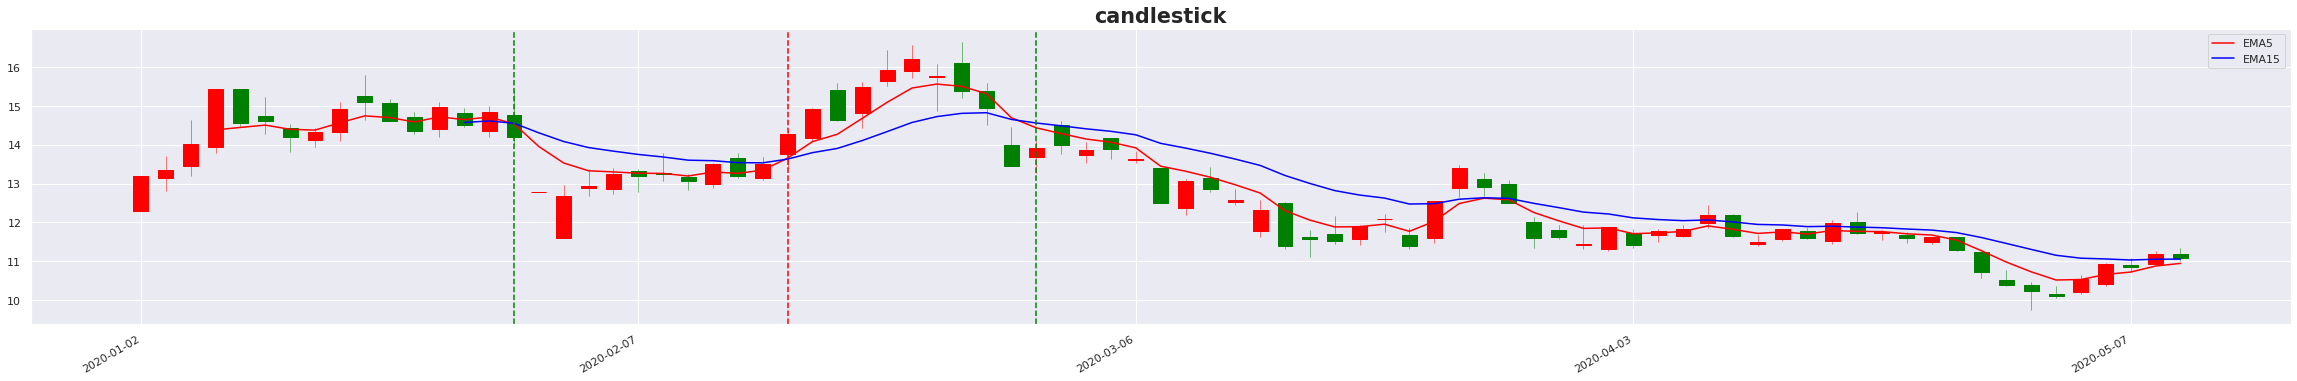

In [34]:
    N = sample.shape[0]
    ind = np.arange(N)

    def format_date(x, pos=None):
        thisind = np.clip(int(x + 0.5), 0, N - 1)
        return sample.index.get_level_values(uti.dayindex)[thisind].strftime(uti.dayformate)

    fig = plt.figure()
    fig.set_size_inches(40.5, 20.5)
    # plt.xlabel('Trading Day')
    # plt.ylabel('MACD EMA')
    #ax2 = fig.add_subplot(6, 1, 1)
    ax2 = fig.add_subplot(3,1,1)
    ax2.set_title("candlestick", fontsize='xx-large', fontweight='bold')

    # fig,ax=plt.subplots()
    # mpf.candlestick_ochl(ax2,quotes,width=0.2,colorup='r',colordown='g',alpha=1.0)
    # ax2.xaxis_date()
    # plt.setp(plt.gca().get_xticklabels(),rotation=30)
    # ax2.plot(ind,sample.close,'b-',marker='*')
    mpf.candlestick_ochl(ax2, quotes, width=0.6, colorup='r', colordown='g', alpha=1.0)
    ax2.plot(ind,sample.EMA5,'r-',label='EMA5')
    ax2.plot(ind,sample.EMA15,'blue',label='EMA15')
    for i in range(N):
        if(sample.c5[i]==1):
            ax2.axvline(x=i,ls='--',color='red')
        if(sample.c15[i]==1):
            ax2.axvline(x=i,ls='--',color='green')
 
    ax2.xaxis.set_major_formatter(mtk.FuncFormatter(format_date))
    # ax2.set_xticklabels(sample.index.get_level_values(index)[::3])
    ax2.grid(True)
    ax2.legend(loc='best')
    fig.autofmt_xdate()




In [36]:
sample.EMA5.shiftft(1)

date        code  
2020-01-02  000810        NaN
2020-01-03  000810        NaN
2020-01-06  000810        NaN
2020-01-07  000810        NaN
2020-01-08  000810    14.3826
2020-01-09  000810    14.4469
2020-01-10  000810    14.5065
2020-01-13  000810    14.3980
2020-01-14  000810    14.3779
2020-01-15  000810    14.5668
                       ...   
2020-04-23  000810    11.6725
2020-04-24  000810    11.5417
2020-04-27  000810    11.2678
2020-04-28  000810    10.9752
2020-04-29  000810    10.7235
2020-04-30  000810    10.5123
2020-05-06  000810    10.5249
2020-05-07  000810    10.6566
2020-05-08  000810    10.7177
2020-05-11  000810    10.8718
Name: EMA5, Length: 83, dtype: float64

In [37]:
sample

,,open,high,low,close,volume,amount,EMA15,EMA5,c5,c15
date,code,,,,,,,,,,
2020-01-02,000810,12.30,13.19,12.30,13.19,531130.0,6.9248e+08,NaN,NaN,0,0
2020-01-03,000810,13.14,13.70,12.80,13.35,521173.0,6.8792e+08,NaN,NaN,0,0
2020-01-06,000810,13.45,14.64,13.20,14.03,479428.0,6.6660e+08,NaN,NaN,0,0
2020-01-07,000810,13.94,15.43,13.79,15.43,379855.0,5.5382e+08,NaN,14.3826,0,0
2020-01-08,000810,15.43,15.43,14.48,14.55,517472.0,7.6609e+08,NaN,14.4469,0,0
2020-01-09,000810,14.73,15.24,14.27,14.61,398253.0,5.8473e+08,NaN,14.5065,0,0
2020-01-10,000810,14.42,14.54,13.81,14.20,344056.0,4.8466e+08,NaN,14.3980,0,0
2020-01-13,000810,14.11,14.42,13.94,14.34,256446.0,3.6392e+08,NaN,14.3779,0,0
2020-01-14,000810,14.34,15.10,14.10,14.93,405727.0,5.9108e+08,NaN,14.5668,0,0


In [39]:
sample.close.shift(1)

date        code  
2020-01-02  000810      NaN
2020-01-03  000810    13.19
2020-01-06  000810    13.35
2020-01-07  000810    14.03
2020-01-08  000810    15.43
2020-01-09  000810    14.55
2020-01-10  000810    14.61
2020-01-13  000810    14.20
2020-01-14  000810    14.34
2020-01-15  000810    14.93
                      ...  
2020-04-23  000810    11.61
2020-04-24  000810    11.28
2020-04-27  000810    10.72
2020-04-28  000810    10.39
2020-04-29  000810    10.22
2020-04-30  000810    10.09
2020-05-06  000810    10.55
2020-05-07  000810    10.92
2020-05-08  000810    10.84
2020-05-11  000810    11.18
Name: close, Length: 83, dtype: float64

In [40]:
sample.close

date        code  
2020-01-02  000810    13.19
2020-01-03  000810    13.35
2020-01-06  000810    14.03
2020-01-07  000810    15.43
2020-01-08  000810    14.55
2020-01-09  000810    14.61
2020-01-10  000810    14.20
2020-01-13  000810    14.34
2020-01-14  000810    14.93
2020-01-15  000810    15.09
                      ...  
2020-04-23  000810    11.28
2020-04-24  000810    10.72
2020-04-27  000810    10.39
2020-04-28  000810    10.22
2020-04-29  000810    10.09
2020-04-30  000810    10.55
2020-05-06  000810    10.92
2020-05-07  000810    10.84
2020-05-08  000810    11.18
2020-05-11  000810    11.08
Name: close, Length: 83, dtype: float64

In [41]:
test = sample.close.shift(1)

In [42]:
len(test)

83

In [43]:
sample.shape[0]

83

In [45]:
n = np.where(sample.close>10,sample.close,10)

array([13.19, 13.35, 14.03, 15.43, 14.55, 14.61, 14.2 , 14.34, 14.93,
       15.09, 14.62, 14.36, 14.98, 14.51, 14.84, 14.2 , 12.78, 12.68,
       12.93, 13.24, 13.2 , 13.25, 13.06, 13.5 , 13.2 , 13.5 , 14.28,
       14.93, 14.65, 15.5 , 15.92, 16.2 , 15.77, 15.39, 14.94, 13.45,
       13.92, 13.99, 13.87, 13.9 , 13.63, 12.5 , 13.06, 12.85, 12.58,
       12.33, 11.39, 11.57, 11.53, 11.9 , 12.08, 11.4 , 12.54, 13.4 ,
       12.9 , 12.5 , 11.6 , 11.61, 11.45, 11.88, 11.41, 11.77, 11.84,
       12.19, 11.65, 11.5 , 11.83, 11.59, 11.97, 11.72, 11.75, 11.59,
       11.61, 11.28, 10.72, 10.39, 10.22, 10.09, 10.55, 10.92, 10.84,
       11.18, 11.08])

In [62]:
m=[0].append(n[:-1])

In [81]:
m=n[:-1].tolist()

In [51]:
test = QA.QA_fetch_stock_min_adv('000810','2019-01-01','2019-01-02',frequence='60min')

m

In [54]:
mind = QA.QA_fetch_stock_min_adv(['000810','000977'],'2019-01-01','2019-01-02',frequence='60min')

In [57]:
type(mind.select_code('000810').data)

pandas.core.frame.DataFrame

In [88]:
single = n[:-1].tolist()

In [90]:
single.insert(0,0)

In [91]:
single

[0,
 13.19,
 13.35,
 14.03,
 15.43,
 14.55,
 14.61,
 14.2,
 14.34,
 14.93,
 15.09,
 14.62,
 14.36,
 14.98,
 14.51,
 14.84,
 14.2,
 12.78,
 12.68,
 12.93,
 13.24,
 13.2,
 13.25,
 13.06,
 13.5,
 13.2,
 13.5,
 14.28,
 14.93,
 14.65,
 15.5,
 15.92,
 16.2,
 15.77,
 15.39,
 14.94,
 13.45,
 13.92,
 13.99,
 13.87,
 13.9,
 13.63,
 12.5,
 13.06,
 12.85,
 12.58,
 12.33,
 11.39,
 11.57,
 11.53,
 11.9,
 12.08,
 11.4,
 12.54,
 13.4,
 12.9,
 12.5,
 11.6,
 11.61,
 11.45,
 11.88,
 11.41,
 11.77,
 11.84,
 12.19,
 11.65,
 11.5,
 11.83,
 11.59,
 11.97,
 11.72,
 11.75,
 11.59,
 11.61,
 11.28,
 10.72,
 10.39,
 10.22,
 10.09,
 10.55,
 10.92,
 10.84,
 11.18]